### __Assigment 2B__
#### __Question 1(a)__

For a given distribution $p(y|x)$ that is the distribution of the outcome $y$ given the data $x$, we usually estimate mean because mean gives us the expected value of $y$ given a certain $x$. It helps us realise the central value around which we can expect $y$ to be.

####__Question 1(b)__
So, for vanilla linear regression, we have the following if $\hat{y}$ is the predicted outcome by the model and $textbf{w}$ is the vector of parameters (weights) then,

$\hat{y}= \textbf{w}^\textbf{T}.\textbf{x}$

So our task is to be able to define such a $\hat{y}$, or in other words, find the required $\textbf{w}$. Since this is vanilla linear regression, there is just one independent variable $x$, hence just one parameter (weight), $w$.
To do so, we'll be using MSE here, so,

$\nabla_wMSE_{train}=0 $, which ultimately gives,

$w=(X^TX)^{-1}X^Ty$

after some linear algebra jazz that is too much to type here (from Goodfellow page 108,109)

where, for us, $X$ is the design matrix (which, in our simple case is just the transpose of the vector $\textbf{x}$ itself since there is just one value of x per training dataset pair, $X=[-x^T-]$) and $y$ is a vector of all target values from the training set. So, one thing to note is that $X^TX$ is just a single value and it's inverse is simply $\frac{1}{X^TX}$.

Now, we've been given that $p(y|x) \sim N(y:\mu,\sigma)$ where $\mu=w*x$ and $\sigma=I$.

So, assuming we generate a dataset that follows such a distribution, we need $x$, which will just be a bunch of single values from a distribution (not specified, could be anything we want so let's take $N(0,1)$, we need a true value of $w$ that we will decide randomly and we need to find the corresponding $y$ which has a mean vector $w*x$ and covariance matrix (size n*n) equal to $I$, which will give us our required dataset. After this, we can use the above relation to estimate $w$ and that should be close to the true value of $w$.

We could, like before, just define the loss function and minimise it using Scipy. So. we'll also try that.

In [ ]:
import numpy as np
from numpy import random

n=1000
x_mean=0
x_sd=1
X=np.random.normal(x_mean,x_sd,size=n)
"""
shape = 1000
value = 1
x_b = np.empty(shape, dtype=np.int)
x_b.fill(value)
X=np.column_stack((x, x_b))

#print(X.shape) # matrix
"""
true_w=random.rand() # could be whatever we want technically
print("True value of parameter: ",true_w)

y_mean=true_w*X
y_covariance=np.eye(n)
y = np.random.multivariate_normal(y_mean, y_covariance)
#print(y.shape) # also a vector

#estimated_w=(np.linalg.inv(X.dot(X.T))).dot((X.T).dot(y))

estimated_w=(np.power(X.dot(X.T),-1))*((X.T).dot(y))
print("Estimated value of parameter, thanks to MSE: ",estimated_w)

# hence we can now use the line y=w*x for our vanilla linear regression model

# however, we should be able to solve for w without doing all the math, so let's try that

from scipy.optimize import minimize

def loss(w,X,y):
  J=0
  for i in range(n):
    J+=0.5*(np.power((w*X[i]-y[i]),2))
  return J
initialparameters=1
result = minimize(loss, initialparameters, args=(X,y), method='L-BFGS-B')
estimated__w=result.x
print("Estimated value of parameter, thanks to Scipy: ",estimated__w[0])



True value of parameter:  0.39942218451390976
Estimated value of parameter, thanks to MSE:  0.38803774521035544
Estimated value of parameter, thanks to Scipy:  0.388037742515314


The choice of sigma here, that is the covariance, is basically telling us how varied our measurements are. So, in our final objective, which was minimising the squared error term, sigma is not exactly doing anything. The given value of sigma is just for generating the dataset we need. While applying MSE and minimising the function to obtain the corresponding $w$, we didn't really need sigma. So, parameterising sigma is not exactly going to do anything.

Yes however, when we observe our predictions, then calculating it's sigma and comparing it to the true sigma can tell us how varied our predictions are.

#### __Question 1(c)__
Having an exponential family distribution means the superpower of being able to appl GLMs (generalised linear models). Exponential families have distribution functions of the form,

$f(x)=b(y)e^{\eta^TT(y)-a(\eta)}$

So, let's choose Poisson distribution. We wanna obtain $b(y), T(y), a(\eta)$ and $\eta$ itself by observing the poisson distribution function,

$f(x)=\frac{\lambda^y.e^{(-\lambda)}}{y!}$, which can be rewritten as

$f(x)=e^{y.ln(\lambda)-\lambda-ln(y!)}$

So,

$\eta=ln(\lambda)$ and $T(y)=y$, at least that is easy to see.

Further for poisson distribution, $\mu=\lambda$ and $\sigma^2=\lambda$

Now, to construct a GLM, we want to predict the expected value of $T(y)$ given $x$. So, we are looking for a prediction $h(x)=E(y|x)$. Further $\eta$ and $x$ are related by $\eta=w^Tx$, where $w$ is our unknown parameter.

Here, $h(x)=E(y|x)=\mu=\lambda=w^Tx$

The problem is that, by definition and usage, $\lambda$ is always greater than or equal to $0$ and a linear relationship like $\lambda=w^Tx$ doesn't seem nice.So, instead, we can use the relationship,

$ln(\lambda_i)=w^Tx$

$=
\begin{pmatrix}
w_0\;w_1
\end{pmatrix}
\times
\begin{pmatrix}
1\\
x_i
\end{pmatrix}
$

Such that, $\lambda_i=e^{w_0+w_1x_i}$

So, what we are trying to estimate are these unknown parameters with the help of this relationship between $\lambda$, $w$ and $x$.
We need to define a loss function, then minimise it to get the desired unknown parameters. Again, problem is that this is no more gaussian! But we do know that we get the same results by minimising loss function as we do by maximising the likelihood function. So, we'll have to go by that approach.
Ultimately, we'll be minimising the negative log-likelihood function, so in a way, that's going to be like our loss function.


In [ ]:
import numpy as np
from numpy import random

def log_likelihood_poisson(w,X,y):
  L=0
  for i in range(1000):
    c=np.exp(w[0]+w[1]*X[i])
    p=c-y[i]*(np.log(c))
    L+=p
  return L

# Let's generate a simple dataset corresponding to all the above stuff
n=1000
X=np.random.randn(n)
w_0=random.rand() # could be whatever we want technically
w_1=random.rand()
print("True value of parameters: ",w_0,",",w_1)
lambda_i=np.exp(w_0+w_1*X)
y=np.random.poisson(lambda_i)


initialparameters=np.array([1,1]) # let's say
result = minimize(log_likelihood_poisson, initialparameters, args=(X,y), method='L-BFGS-B')
estimated__w=result.x
print("Estimated value of parameter, thanks to Scipy: ",estimated__w[0], ",",estimated__w[1])



True value of parameters:  0.5468524318685486 , 0.9830005256800832
Estimated value of parameter, thanks to Scipy:  0.49062509412517374 , 1.0114374335545537


#### __Question 2__

Firstly, the dataset is on my drive so path should be changed accordingly in order to run this code.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mean Squared Error (MODEL A) (Test Set A): 22.25770734371434
Mean Squared Error (MODEL A) (Test Set B): 2.5616550522775925
Mean Squared Error (MODEL A) (Test Set C): 0.062457236803248974
Mean Squared Error (MODEL B) (Test Set A): 32.73219379378818
Mean Squared Error (MODEL B) (Test Set B): 1.9577195262268569e-25
Mean Squared Error (MODEL B) (Test Set C): 2.6140814129669656
Mean Squared Error (MODEL C) (Test Set A): 16.15674668223636
Mean Squared Error (MODEL C) (Test Set B): 15.774197648432851
Mean Squared Error (MODEL C) (Test Set C): 5.699794881410673
Minimum error:  1.9577195262268569e-25


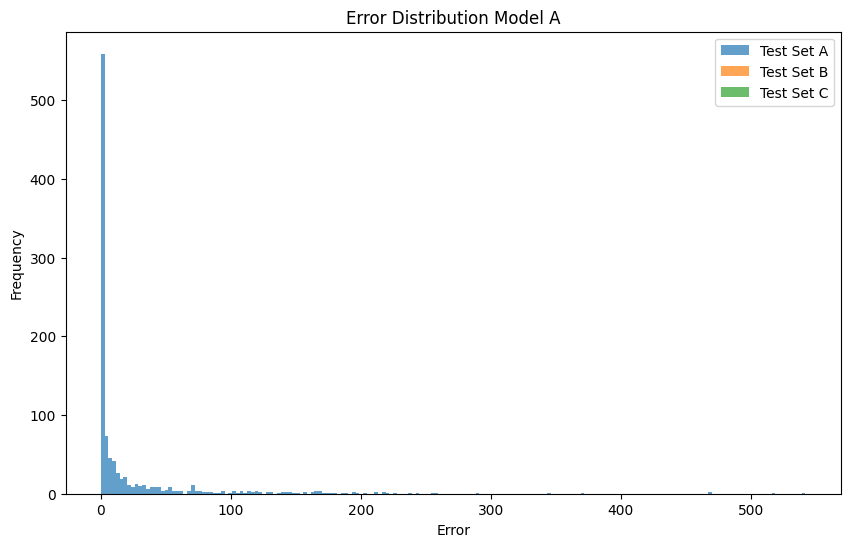

Error Distribution (MODEL A) (Test Set A): Mean = 22.25770734371434 Standard Deviation = 53.96589716508258
Error Distribution (MODEL A) (Test Set B): Mean = 2.5616550522775925 Standard Deviation = 0.0022966488099699024
Error Distribution (MODEL A) (Test Set C): Mean = 0.062457236803248974 Standard Deviation = 0.08652385376675549


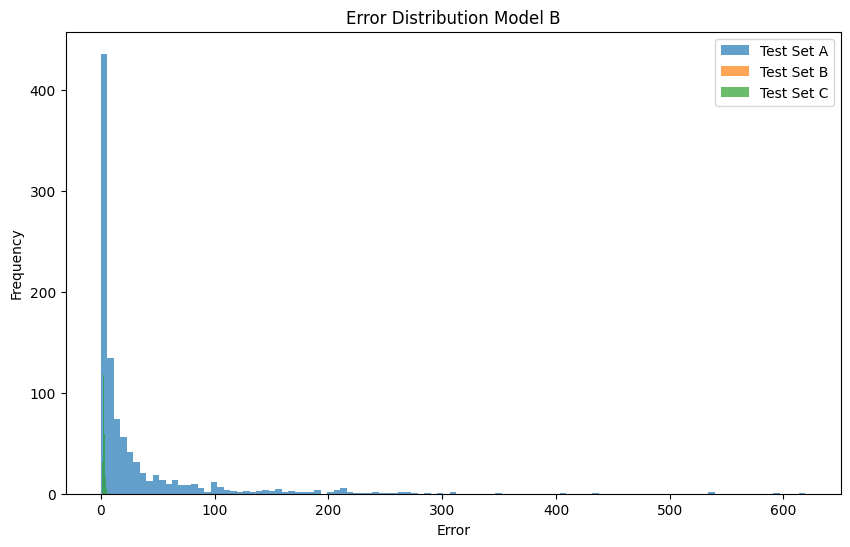

Error Distribution (MODEL B) (Test Set A): Mean = 32.73219379378818 Standard Deviation = 65.61751153849882
Error Distribution (MODEL B) (Test Set B): Mean = 1.9577195262268569e-25 Standard Deviation = 1.892899978318431e-25
Error Distribution (MODEL B) (Test Set C): Mean = 2.6140814129669656 Standard Deviation = 0.8034601498911891


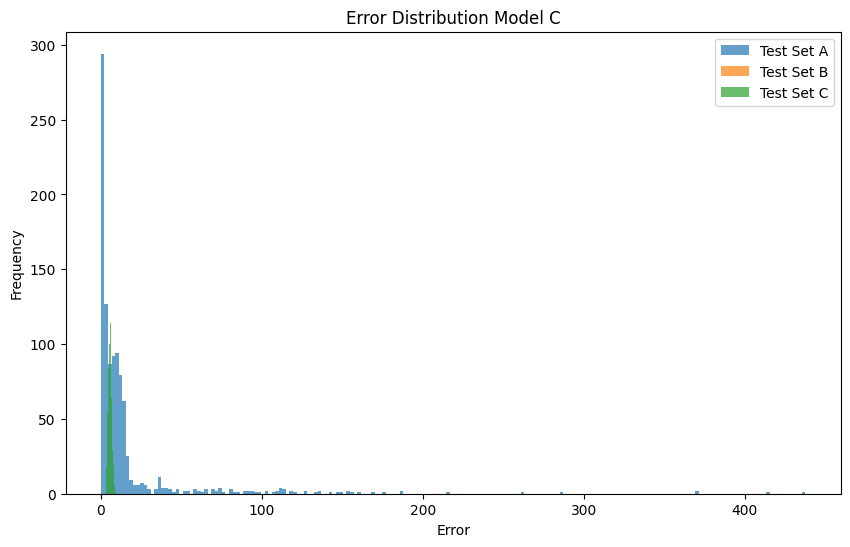

Error Distribution (MODEL C) (Test Set A): Mean = 16.15674668223636 Standard Deviation = 38.162560581973146
Error Distribution (MODEL C) (Test Set B): Mean = 15.774197648432851 Standard Deviation = 0.03993390753228745
Error Distribution (MODEL C) (Test Set C): Mean = 5.699794881410673 Standard Deviation = 1.1902720177778146


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ds_trainA = pd.read_csv('/content/drive/MyDrive/Q2/train_set_A.csv')
ds_trainB = pd.read_csv('/content/drive/MyDrive/Q2/train_set_B.csv')
ds_trainC = pd.read_csv('/content/drive/MyDrive/Q2/train_set_C.csv')
ds_testA = pd.read_csv('/content/drive/MyDrive/Q2/test_set_A.csv')
ds_testB = pd.read_csv('/content/drive/MyDrive/Q2/test_set_B.csv')
ds_testC = pd.read_csv('/content/drive/MyDrive/Q2/test_set_C.csv')

x_train_A, y_train_A = ds_trainA[['x']], ds_trainA['y']
x_train_B, y_train_B = ds_trainB[['x']], ds_trainB['y']
x_train_C, y_train_C = ds_trainC[['x']], ds_trainC['y']
x_test_A, y_test_A = ds_testA[['x']], ds_testA['y']
x_test_B, y_test_B = ds_testB[['x']], ds_testB['y']
x_test_C, y_test_C = ds_testC[['x']], ds_testC['y']

model_A = LinearRegression().fit(x_train_A, y_train_A)
model_B = LinearRegression().fit(x_train_B, y_train_B)
model_C = LinearRegression().fit(x_train_C, y_train_C)


# now since it's not necessary for train set A and test set A to come from the same distribution
# in order to find the actual data distribution, we'll have to see which train and test set pair
# has the least MSE, that pair would be the one coming from the actual distribution

mse_AA= mean_squared_error(y_test_A, model_A.predict(x_test_A))
mse_AB= mean_squared_error(y_test_B, model_A.predict(x_test_A))
mse_AC= mean_squared_error(y_test_C, model_A.predict(x_test_A))

mse_BA = mean_squared_error(y_test_A, model_B.predict(x_test_B))
mse_BB = mean_squared_error(y_test_B, model_B.predict(x_test_B))
mse_BC = mean_squared_error(y_test_C, model_B.predict(x_test_B))

mse_CA = mean_squared_error(y_test_A, model_C.predict(x_test_C))
mse_CB = mean_squared_error(y_test_B, model_C.predict(x_test_C))
mse_CC = mean_squared_error(y_test_C, model_C.predict(x_test_C))

print("Mean Squared Error (MODEL A) (Test Set A):", mse_AA)
print("Mean Squared Error (MODEL A) (Test Set B):", mse_AB)
print("Mean Squared Error (MODEL A) (Test Set C):", mse_AC)

print("Mean Squared Error (MODEL B) (Test Set A):", mse_BA)
print("Mean Squared Error (MODEL B) (Test Set B):", mse_BB)
print("Mean Squared Error (MODEL B) (Test Set C):", mse_BC)

print("Mean Squared Error (MODEL C) (Test Set A):", mse_CA)
print("Mean Squared Error (MODEL C) (Test Set B):", mse_CB)
print("Mean Squared Error (MODEL C) (Test Set C):", mse_CC)

errors=np.array([mse_AA,mse_AB,mse_AC,mse_BA,mse_BB,mse_BC,mse_CA,mse_CB,mse_CC])
min_error=np.min(errors)
print("Minimum error: ",min_error)

# clearly it's train and test set B that comes from the original distribution

# now let's plot stuff

error_AA = np.power((y_test_A - model_A.predict(x_test_A)),2)
error_AB = np.power((y_test_B - model_A.predict(x_test_B)),2)
error_AC = np.power((y_test_C - model_A.predict(x_test_C)),2)

error_BA = np.power((y_test_A - model_B.predict(x_test_A)),2)
error_BB = np.power((y_test_B - model_B.predict(x_test_B)),2)
error_BC = np.power((y_test_C - model_B.predict(x_test_C)),2)

error_CA = np.power((y_test_A - model_C.predict(x_test_A)),2)
error_CB = np.power((y_test_B - model_C.predict(x_test_B)),2)
error_CC = np.power((y_test_C - model_C.predict(x_test_C)),2)


# model A
plt.figure(figsize=(10, 6))
plt.hist(error_AA, bins='auto', alpha=0.7, label='Test Set A')
plt.hist(error_AB, bins='auto', alpha=0.7, label='Test Set B')
plt.hist(error_AC, bins='auto', alpha=0.7, label='Test Set C')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution Model A')
plt.legend()
plt.show()

distribution_AA = np.mean(error_AA), np.std(error_AA)
distribution_AB = np.mean(error_AB), np.std(error_AB)
distribution_AC = np.mean(error_AC), np.std(error_AC)

print("Error Distribution (MODEL A) (Test Set A): Mean =", distribution_AA[0], "Standard Deviation =", distribution_AA[1])
print("Error Distribution (MODEL A) (Test Set B): Mean =", distribution_AB[0], "Standard Deviation =", distribution_AB[1])
print("Error Distribution (MODEL A) (Test Set C): Mean =", distribution_AC[0], "Standard Deviation =", distribution_AC[1])

# model B

plt.figure(figsize=(10, 6))
plt.hist(error_BA, bins='auto', alpha=0.7, label='Test Set A')
plt.hist(error_BB, bins='auto', alpha=0.7, label='Test Set B')
plt.hist(error_BC, bins='auto', alpha=0.7, label='Test Set C')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution Model B')
plt.legend()
plt.show()

distribution_BA = np.mean(error_BA), np.std(error_BA)
distribution_BB = np.mean(error_BB), np.std(error_BB)
distribution_BC = np.mean(error_BC), np.std(error_BC)

print("Error Distribution (MODEL B) (Test Set A): Mean =", distribution_BA[0], "Standard Deviation =", distribution_BA[1])
print("Error Distribution (MODEL B) (Test Set B): Mean =", distribution_BB[0], "Standard Deviation =", distribution_BB[1])
print("Error Distribution (MODEL B) (Test Set C): Mean =", distribution_BC[0], "Standard Deviation =", distribution_BC[1])

# model C

plt.figure(figsize=(10, 6))
plt.hist(error_CA, bins='auto', alpha=0.7, label='Test Set A')
plt.hist(error_CB, bins='auto', alpha=0.7, label='Test Set B')
plt.hist(error_CC, bins='auto', alpha=0.7, label='Test Set C')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution Model C')
plt.legend()
plt.show()

distribution_CA = np.mean(error_CA), np.std(error_CA)
distribution_CB = np.mean(error_CB), np.std(error_CB)
distribution_CC = np.mean(error_CC), np.std(error_CC)

print("Error Distribution (MODEL C) (Test Set A): Mean =", distribution_CA[0], "Standard Deviation =", distribution_CA[1])
print("Error Distribution (MODEL C) (Test Set B): Mean =", distribution_CB[0], "Standard Deviation =", distribution_CB[1])
print("Error Distribution (MODEL C) (Test Set C): Mean =", distribution_CC[0], "Standard Deviation =", distribution_CC[1])

# by comparing each of the parameters, we can see how mean and standard deviation are also lowest for train and test set B pair.
# test set A always has the highest error for each model
# further, test set A gives least error on model C, test set B on model B and test set C on model A
# we can see the second least error is for model A on test set C

# We can observe these plots and see how they're different, however I can't see what vital information we can obtain from this

#### __Question 3__



In [125]:
from os import waitstatus_to_exitcode
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


n=1000
f=1
x=np.random.normal(0, 1, (n,f))
w0=4
w1=3
w=np.array([w0,w1])
x_b=np.ones(n)
x_new=np.column_stack((x_b,x))
z=np.dot(x_new,w)
p=1 / (1 + np.exp(-z))
y=np.random.binomial(1, p)
print("True weights are, w0= ",w0," and w1= ",w1)


def loglikelihood(w0,w1,x,y):
  LL=0
  m=x.shape[0]
  for i in range(m):
    z=w0+w1*x[i]
    p=1/(1+np.exp(-z))
    LL+=y[i]*(np.log(p))+(1-y[i])*(np.log(1-p))
  return LL

def cost_function(w0,w1,x, y):
  m=x.shape[0]
  C=0
  for i in range(m):
    z=w0+w1*x[i]
    p=1 / (1 + np.exp(-z))
    C+= np.power((p-y[i]),2)
  return C

def batchgradientdescent(w0,w1,x,y,l,i,c):
  converged=False
  i_current=0
  m=x.shape[0]
  m=x.shape[0]
  J=0
  for i in range(m):
    z__=w0+w1*x[i]
    p__=1 / (1 + np.exp(-z__))
    J+= np.power((p__-y[i]),2)

  while not converged:

    w=np.array([w0,w1])
    x_b=np.ones(m)
    x_new=np.column_stack((x_b,x))
    z=np.dot(x_new,w)
    p=1/(1+np.exp(-z))

    update0=np.sum((1/m)*(p-y))
    update1=np.sum((1/m)*((p-y)*x))

    temp_w0=w0-l*update0
    temp_w1=w1-l*update1

    w0=temp_w0
    w1=temp_w1

    e=0
    for i in range(m):
      z_=w0+w1*x[i]
      p_=1 / (1 + np.exp(-z_))
      e+= np.power((p_-y[i]),2)
    if abs(J-e)<=c:
      print("Converged in: ",i_current," iterations.")
      converged=True

    J=e
    i_current+=1

    if i_current==i:
      print("Maximum iterations reached.")
      converged=True
  return w0,w1

bgd_estimated_w0,bgd_estimated_w1=batchgradientdescent(0,0,x,y,0.01,5000,0.0001)
print("Weights estimated by Batch Gradient Descent are, w0= ",bgd_estimated_w0," and w1= ",bgd_estimated_w1)

# I can't figure out why it's giving such a shitty results? :( Sometimes it's giving a reasonable value and sometimes it's just absurd (especially w1), there's no consistency

def fisherscoring(X,Y,c):

  # desgin matrix X

  # response vector is y as usual, written as Y

  # probability vector p
  w_initial=np.matrix(np.ones(np.shape(X)[1])).T
  z = np.dot(X,w_initial)
  p_initial=1/(1+np.exp(-z))

  # weight matrix
  W_= (np.array(p_initial) * np.array(1 - p_initial))
  W= np.matrix(np.diag(W_[:, 0]))

  # c is the threshold value above which iterations continue
  c=0.001

  #First derivative of Log-Likelihood with respect to each weight
  U=(X.T)*(Y-p_initial)

  # Second derivative of Log-Likelihood with respect to each weight
  H=(X.T)*(W)*X

  i_current=0
  while True:
    i_current+=1
    w_current=w_initial+ (np.linalg.inv(H))*U

    if (np.abs(np.array(w_current)-np.array(w_initial)) < c).all:
        model_parameters  = w_current
        break
    else:
      z=np.dot(X,w_current)
      p_initial=1/(1+np.exp(-z))
      W_ = (np.array(p_initial) * np.array(1 - p_initial))
      W = np.matrix(np.diag(W_[:, 0]))
      H= X.T * W * X
      U= X.T * (Y - p_initial)
      w_initial= w_current
  print("Converged in ",i_current," iterations.")
  return np.array(model_parameters)

fs_estimated_w0,fs_estimated_w1=fisherscoring(x_new,y,0.001)
print("Weights estimated by Fisher Scoring are, w0= ",fs_estimated_w0[0]," and w1= ",fs_estimated_w1[0])

# again there's some issue in the value of w1 and weirdly, there's only one iteration happening? :(
# gave up after a while cause everything seems absurd now ugh

True weights are, w0=  4  and w1=  3
Maximum iterations reached.
Weights estimated by Batch Gradient Descent are, w0=  3.114909961958382  and w1=  22.272814185384274
Converged in  1  iterations.
Weights estimated by Fisher Scoring are, w0=  2.501166396975581  and w1=  0.3212582200477815


#### __Question 4__

a. The sample size n is extremely large, and the number of predictors p is small.

The performance of a flexible model would be better. This is because n is extremely large, so we have a lot of information to learn from. This is good because the problem of overfitting reduces. Overfitting usually occurs when we use a flexible model for small n. That's not the case here, though. We have sufficient data to ensure we don't overfit. Besides the number of predictors (independent variables is small) so we have a simpler predictor-response relationship and more generalisation.
For a flexible model, we usually have high variance and low bias. High variance will occur here if there is a very non-linear relationship between predictor (input) and the outcome (response). But with smaller number of features, we can expect a simpler model mostly, so the variance shouldn't be very high.

b. The number of predictors p is extremely large, and the number of observations n is small.

Now, here an inflexible model is better.
Small n means the risk of overfitting is high with a flexible model. Plus, the number of predictors is extremely large, so that increases the risk because we have noise in the data. So, it's better we have an inflexible model such that we can have at least some generalisation.
Inflexible model implies lower variance and high number of predictors implies the possibility of a complex relationship between response and predictors so we might have low bias. In case there is simple relation (as should be for an inflexible model), we can expect higher bias.

c. The relationship between the predictors and response is highly non-linear.

A flexible model is better since it can capture the intricacies of the non-linear relationship hence give more accurate results. An inflexible model will miss out most details. However, depending on the sample size, we might see overfitting of data.
Highly flexible model means lower bias but higher variance.